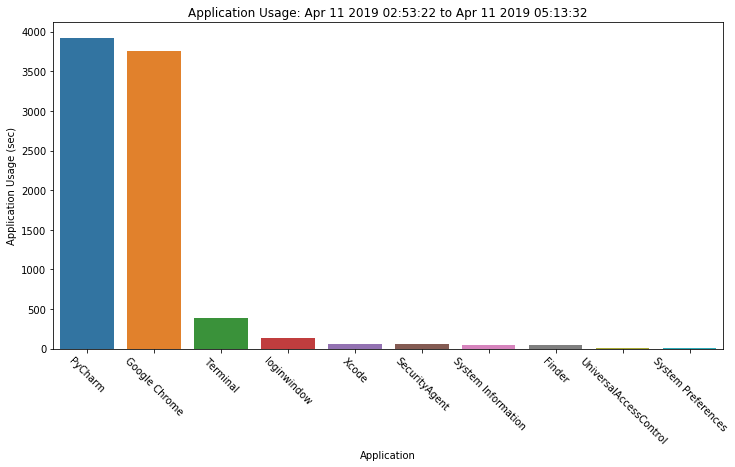

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import re
import collections
import datetime

LOG_FILE_PATH = '/var/log/active_window.log'
LOG_LINE_RE_PATTERN = re.compile('time=(.*), name=(.*)')

class LogLine(object):
    """ Simple object to encapsulate a log line. """
    def __init__(self, time: float, name: str, duration: float=None):
        self.time = time
        self.name = name
        self.duration = duration

# Read in all the logs from the log file
logs = []
with open(LOG_FILE_PATH) as f:
    for line in f:
        matches = LOG_LINE_RE_PATTERN.search(line)
        logs.append(LogLine(
            time=float(matches.group(1)), 
            name=matches.group(2),
        ))

# Find how long the user has been in the app
logs_with_durations = []
for i in range(len(logs) - 1):
    logs_with_durations.append(LogLine(
        time=logs[i + 1].time,
        name=logs[i + 1].name,
        duration=logs[i + 1].time - logs[i].time,
    ))

# Accumulate the durations
value_accumulation = collections.defaultdict(float)
for log in logs_with_durations:
    value_accumulation[log.name] += log.duration

# Sort, descending, by duration
sorted_dictionary = sorted(value_accumulation.items(), key=lambda kv: -kv[1])
names, durations = zip(*sorted_dictionary)
names, durations = np.array(names, dtype=str), np.array(durations, dtype=float)

def format_time_for_title(dt: float) -> str:
    return datetime.datetime.utcfromtimestamp(dt).strftime("%b %d %Y %H:%M:%S")

# When the log started and stops
start_time, end_time = min(log.time for log in logs), max(log.time for log in logs)

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Application Usage: %s to %s' % (format_time_for_title(start_time), format_time_for_title(end_time)))
plt.xticks(rotation=-45)
ax.set_xlabel('Application')
ax.set_ylabel('Application Usage (sec)')
sns.barplot(names, durations, ax=ax)